# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Mirrors as potential environmental enrichment for individually housed laboratory mice

(Sherwin, 2004): 16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из комнат висело зеркало. С целью установить, есть ли у мышей какие-то предпочтения насчет зеркал, измерялась доля времени, которое каждая мышь проводила в каждой из своих двух клеток.

In [1]:
import numpy as np
import pandas as pd
import itertools

from scipy import stats
from statsmodels.stats.descriptivestats import sign_test
from statsmodels.stats.weightstats import zconfint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
mouses_data = pd.read_csv('../../mirror_mouses.txt', header = None)
mouses_data.columns = ['proportion_of_time']

In [4]:
mouses_data

,proportion_of_time
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444
5,0.426292
6,0.417156
7,0.477977
8,0.450657
9,0.476602


In [5]:
mouses_data.describe()

,proportion_of_time
count,16.000000
mean,0.475289
std,0.066065
min,0.348471
25%,0.444566
50%,0.477289
75%,0.488859
max,0.640620


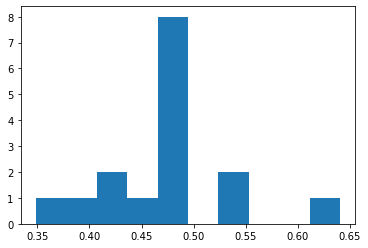

In [6]:
pylab.hist(mouses_data.proportion_of_time)
pylab.show()

## Одновыборочные критерии

In [7]:
print('95%% confidence interval for the mean time: [%f, %f]' % zconfint(mouses_data))

95% confidence interval for the mean time: [0.442918, 0.507660]


### Критерий знаков

$H_0\colon$ медиана доли времени, проведенного в клетке с зеркалом, равна 0.5

$H_1\colon$ медиана доли времени, проведенного в клетке с зеркалом, не равна 0.5

In [8]:
print("M: %d, p-value: %f" % sign_test(mouses_data, 0.5))

M: -5, p-value: 0.021271


Or

In [9]:
a = mouses_data > 0.5
stats.binom_test(a.sum(), 16, 0.5)

0.021270751953125

In [10]:
from math import factorial
total_p = 0
p = 0.5
for i in range(1, 4):
    Cnk = factorial(16) / (factorial(16 - i) * factorial(i))
    total_p += Cnk * (p ** i) * ((1 - p) ** (16 - i))
2 * total_p

0.021240234375

### Критерий знаковых рангов Вилкоксона

In [11]:
m0 = 0.5
stats.wilcoxon(mouses_data.proportion_of_time - m0)

WilcoxonResult(statistic=35.0, pvalue=0.08793560714236243)

### Перестановочный критерий

$H_0\colon$ среднее равно 0.5

$H_1\colon$ среднее не равно 0.5

In [12]:
def permutation_t_stat_1sample(sample, mean):
#     t_stat = sum(list(map(lambda x: x - mean, sample)))
    t_stat = (sample - mean).sum()
    return t_stat

In [13]:
permutation_t_stat_1sample(mouses_data.proportion_of_time, 0.5)

-0.3953776999999997

In [14]:
def permutation_zero_distr_1sample(sample, mean, max_permutations=None):
#     centered_sample = list(map(lambda x: x - mean, sample))
    centered_sample = (sample - mean).tolist()
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array = itertools.product([-1, 1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

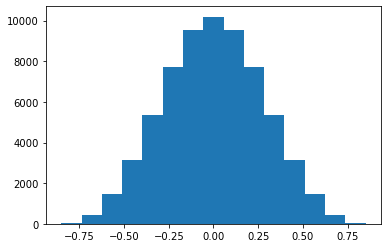

In [15]:
pylab.hist(permutation_zero_distr_1sample(mouses_data.proportion_of_time, 0.5), bins=15)
pylab.show()

In [16]:
def permutation_test(sample, mean, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [17]:
print("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5))

p-value: 0.157776


In [18]:
print("p-value: %f" % permutation_test(mouses_data.proportion_of_time, 0.5, 10000))

p-value: 0.158668


# Непараметрические криетрии

  Критерий | Одновыборочный | Двухвыборочный | Двухвыборочный (связанные выборки)  
  ------------- | -------------|
  **Знаков**  | $\times$ | | $\times$ 
  **Ранговый** | $\times$  | $\times$ | $\times$  
  **Перестановочный** | $\times$  | $\times$ | $\times$ 

## Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [20]:
weight_data = pd.read_csv('../../weight.txt', sep = '\t', header = 0)

In [21]:
weight_data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [22]:
weight_data.describe()

,Before,After
count,29.000000,29.000000
mean,82.689655,85.696552
std,4.845495,8.351924
min,70.000000,71.300000
25%,80.400000,81.900000
50%,82.600000,83.900000
75%,85.000000,90.900000
max,94.900000,103.600000


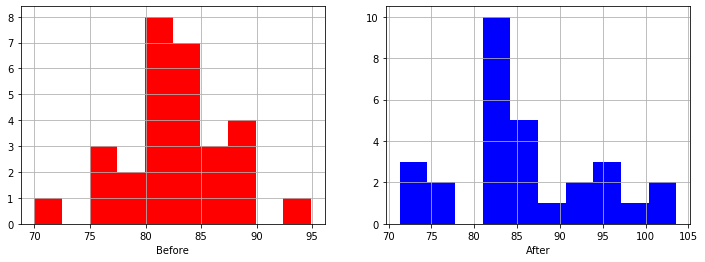

In [23]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(weight_data.Before, color = 'r')
pylab.xlabel('Before')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(weight_data.After, color = 'b')
pylab.xlabel('After')

pylab.show()

Сделаем интервальную оценку на средний вес

## Двухвыборочные критерии для связных выборок

$H_0\colon$ медианы веса до и после терапии совпадает

$H_1\colon$ медианы веса до и после тепрапии отличаются

In [24]:
print('95%% confidence interval for mean weight before therapy: [%f, %f]' % zconfint(weight_data.Before))

95% confidence interval for mean weight before therapy: [80.926107, 84.453203]


In [25]:
print('95%% confidence interval for mean weight after therapy: [%f, %f]' % zconfint(weight_data.After))

95% confidence interval for mean weight after therapy: [82.656817, 88.736286]


Интервалы до терапии и после терапии пересекаются. Одназначный вывод сделать нельзя

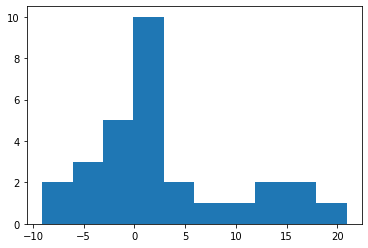

In [26]:
pylab.hist(weight_data.After - weight_data.Before)
pylab.show()

### Критерий знаков

$H_0\colon P\left(X_1>X_2\right)=\frac1{2},$

$H_1\colon P\left(X_1>X_2\right)\neq\frac1{2}$

In [27]:
print("M: %d, p-value: %f" % sign_test(weight_data.After - weight_data.Before))

M: 3, p-value: 0.264931


or

In [28]:
b = weight_data.After > weight_data.Before
stats.binom_test(b.sum(), 29, 0.5)

0.26493089646101

In [29]:
((weight_data.After - weight_data.Before) > 0).sum()

18

In [30]:
from math import factorial
total_p = 0
p = 0.5
for i in range(1, 12):
    Cnk = factorial(29) / (factorial(29 - i) * factorial(i))
    total_p += Cnk * (p ** i) * ((1 - p) ** (29 - i))
2 * total_p

0.2649308927357197

### Критерий знаковых рангов Уилкоксона

$H_0\colon med\left(X_1-X_2\right)=0,$

$H_1\colon med\left(X_1-X_2\right)\neq0$

In [ ]:
stats.wilcoxon(weight_data.After, weight_data.Before)

In [ ]:
stats.wilcoxon(weight_data.After - weight_data.Before)

### Перестановочный критерий

$H_0\colon \mathbb{E}(X_1 - X_2) = 0$

$H_1\colon \mathbb{E}(X_1 - X_2) \neq 0$

In [ ]:
def permutation_t_stat_1sample(sample, mean):
#     t_stat = sum(list(map(lambda x: x - mean, sample)))
    t_stat = (sample - mean).sum()
    return t_stat

In [ ]:
def permutation_zero_distr_1sample(sample, mean, max_permutations=None):
#     centered_sample = list(map(lambda x: x - mean, sample))
    centered_sample = (sample - mean).tolist()
    if max_permutations:
        signs_array = set([tuple(x) for x in 2 * np.random.randint(2, size=(max_permutations, 
                                                                              len(sample))) - 1 ])
    else:
        signs_array = itertools.product([-1, 1], repeat=len(sample))
    distr = [sum(centered_sample * np.array(signs)) for signs in signs_array]
    return distr

In [ ]:
pylab.hist(permutation_zero_distr_1sample(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 10000))
pylab.show()

In [ ]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_1sample(sample, mean)
    
    zero_distr = permutation_zero_distr_1sample(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
print("p-value: %f" % permutation_test(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 1000))

In [ ]:
print("p-value: %f" % permutation_test(weight_data.After - weight_data.Before, 0., 
                               max_permutations = 50000))

## Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002. Изменились ли в среднем цены?

In [ ]:
from statsmodels.stats.weightstats import *

In [ ]:
seattle_data = pd.read_csv('seattle.txt', sep='\t', header=0)

In [ ]:
seattle_data.shape

In [ ]:
seattle_data.head()

In [ ]:
price2001 = seattle_data[seattle_data['Year']  == 2001].Price
price2002 = seattle_data[seattle_data['Year']  == 2002].Price

In [ ]:
price2001.describe()

In [ ]:
price2002.describe()

In [ ]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(price2001, color = 'r')
pylab.xlabel('2001')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(price2002, color = 'b')
pylab.xlabel('2002')

pylab.show()

По гистограмме не очень понятно, изменились ли цены

## Двухвыборочные критерии для независимых выборок

In [ ]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2001))

In [ ]:
print('95%% confidence interval for the mean: [%f, %f]' % zconfint(price2002))

Интервалы пересекаются => сложно сделать вывод о том, изменились ли цены

$H_0\colon$ медианы стимости в 2001 и 2002 годах совпадают

$H_1\colon$ медианы стимости в 2001 и 2002 годах не совпадают

### Ранговый критерий Манна-Уитни

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
stats.mannwhitneyu(price2001, price2002, alternative='two-sided') # по сравнению с scipy 1.2.x, где режим по умолчанию не None

### Перестановочный критерий

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

In [ ]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [ ]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [ ]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [ ]:
pylab.hist(permutation_zero_dist_ind(price2001, price2002, max_combinations=1000))
pylab.show()

In [ ]:
def permutation_test(sample, mean, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations=10000))

In [ ]:
print("p-value: %f" % permutation_test(price2001, price2002, max_permutations=50000))

Давайте вернёмся к данным выживаемости пациентов с лейкоцитарной лимфомой из видео про критерий знаков:

49, 58, 75, 110, 112, 132, 151, 276, 281, 362^*
49,58,75,110,112,132,151,276,281,362 
∗
 

Измерено остаточное время жизни с момента начала наблюдения (в неделях); звёздочка обозначает цензурирование сверху — исследование длилось 7 лет, и остаточное время жизни одного пациента, который дожил до конца наблюдения, неизвестно.

Поскольку цензурировано только одно наблюдение, для проверки гипотезы H_0\colon med X = 200H 
0
​	
 :medX=200 на этих данных можно использовать критерий знаковых рангов — можно считать, что время дожития последнего пациента в точности равно 362, на ранг этого наблюдения это никак не повлияет. 

Критерием знаковых рангов проверьте эту гипотезу против двусторонней альтернативы, введите достигаемый уровень значимости, округлённый до четырёх знаков после десятичной точки.

In [ ]:
alive_weeks = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])

m0 = 200
print(f"p-value: {stats.wilcoxon(alive_weeks - m0)}")

В ходе исследования влияния лесозаготовки на биоразнообразие лесов острова Борнео собраны данные о количестве видов деревьев в 12 лесах, где вырубка не ведётся:

22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15,
22,22,15,13,19,19,18,20,21,13,13,15,

и в 9 лесах, где идёт вырубка:

17, 18, 18, 15, 12, 4, 14, 15, 10.
17,18,18,15,12,4,14,15,10.

Проверьте гипотезу о равенстве среднего количества видов в двух типах лесов против односторонней альтернативы о снижении биоразнообразия в вырубаемых лесах. Используйте ранговый критерий. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.



In [ ]:
there_not_felling = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15])
there_felling = np.array([17, 18, 18, 15, 12, 4, 14, 15, 10])

In [ ]:
print('95%% confidence interval for mean weight before therapy: [%f, %f]' % zconfint(there_not_felling))

In [ ]:
print('95%% confidence interval for mean weight before therapy: [%f, %f]' % zconfint(there_felling))

In [ ]:
stats.mannwhitneyu(there_not_felling, there_felling, alternative='greater')

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

* установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
* сделайте по 1000 псевдовыборок из каждой выборки.

In [ ]:
data_challenger = pd.read_csv('../../challenger.txt', sep='\t', header=0)

In [ ]:
data_challenger.head()

In [ ]:
data_challenger.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [ ]:
data_challenger.describe()

In [ ]:
rings_damaged = data_challenger.loc[data_challenger['Incident'] == 1].Temperature

In [ ]:
rings_not_damaged = data_challenger.loc[data_challenger['Incident'] == 0].Temperature

In [ ]:
rings_not_damaged

In [ ]:
def odds(data):
    p = data.sum() / data.shape[0]
    return p / (1 - p)

In [ ]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [ ]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [ ]:
np.random.seed(0)
rings_damaged_bootstrap = np.array(list(map(np.mean, get_bootstrap_samples(rings_damaged.values, 1000))))
rings_not_damaged_bootstrap = np.array(list(map(np.mean, get_bootstrap_samples(rings_not_damaged.values, 1000))))

In [ ]:
delta_mean_scores = list(map(lambda x: x[1] - x[0], zip(rings_damaged_bootstrap, rings_not_damaged_bootstrap)))

In [ ]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_mean_scores, 0.05))

In [ ]:
days_where_damage_rings = data_challenger.loc[data_challenger['Incident'] == 1].date.values

In [ ]:
days_where_not_damage_rings = data_challenger.loc[data_challenger['Incident'] == 0].date.values

In [ ]:
rings_damaged

In [ ]:
rings_not_damaged

In [ ]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [ ]:
def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [ ]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [ ]:
pylab.hist(permutation_zero_dist_ind(rings_damaged, rings_not_damaged, max_combinations=10000))
pylab.show()

In [ ]:
def permutation_test(sample, mean, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [ ]:
np.random.seed(0)
print("p-value: %f" % permutation_test(rings_damaged, rings_not_damaged, max_permutations=10000))